In [2]:
!pip install sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached sklearn-0.0-py2.py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.2 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 8.8 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discuss

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, time, glob,warnings, glob
from itertools import product
from scipy.stats import *
from sklearn.mixture import GaussianMixture
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import axes_grid

In [4]:
result_dbs= glob.glob('./Anomaliesv2.0_CIplot/*')
namedb= np.array(['baseline_v2.0_10yrs','noroll_v2.0_10yrs','rolling_ns2_rw0.5_v2.0_10yrs','vary_gp_gpfrac0.10_v2.0_10yrs'])
mafs= {k:{} for k in namedb}
for metric in ['CI_dist','CI_dens']:
    for i, dbs in enumerate(np.sort(result_dbs)):    
        # FBB unsafe indexing - cannot ensure that the dictionary holds the right db
        if metric in dbs:
            dump = np.load(dbs)
            dump.allow_pickle=True
            m = dump['metricValues'][np.where(dump['mask']==False)]
            mafs[namedb[i//2]][metric] = m

In [27]:
result_dbs= glob.glob('./Anomaliesv1.7_CIplot/*')
namedb17= np.array(['baseline_nexp1_v1.7_10yrs','footprint_2_v1.710yrs','rolling_scale0.6_nslice2_v1.7_10yrs','twi_neo_pattern1_v1.7_10yrs'])
mafs17= {k:{} for k in namedb17}
for metric in ['CI_dens','CI_dist']:
    for i, dbs in enumerate(np.sort(result_dbs)):
        if metric in dbs:
            dump = np.load(dbs)
            dump.allow_pickle=True
            m = dump['metricValues'][np.where(dump['mask']==False)]
            mafs17[namedb17[i//2]][metric] = m

In [7]:
dataout,mags_dist, cind_dist,H_dist,c_dist,alpha_dist,err_ell_dist, label={},{},{},{},{},{},{},{}
for key in namedb:
    dataout[key]=mafs[key]['CI_dist'][0]
    cind_dist[key]= {}
    H_dist[key]= {}
    c_dist[key]= {}
    alpha_dist[key]={}
    err_ell_dist[key]={}
    #mags_dist[key]={}
    #print(dataout)
    # FBB why do you have 3 of the same loops??
    # consolidate
    for mag in dataout[key].keys(): 
        print(key)
        cind_dist[key][mag] = []
        H_dist[key][mag] = []
        c_dist[key][mag] = []
        alpha_dist[key][mag]=[]
        err_ell_dist[key][mag]=[]
        
    # why do you have 2 of the same loops??        
    for mag in dataout[key].keys():
                cind_dist[key][mag].append(dataout[key][mag]['CI'])
                H_dist[key][mag].append(dataout[key][mag]['Hg'])
                c_dist[key][mag].append(dataout[key][mag]['gr'])
                alpha_dist[key][mag].append(dataout[key][mag]['alpha'])
                err_ell_dist[key][mag].append(dataout[key][mag]['err'])
                
    for mag in dataout[key].keys(): 
        cind_dist[key][mag]=np.hstack(np.array(cind_dist[key][mag])[np.isfinite(np.array(cind_dist[key][mag]))])
        H_dist[key][mag]=np.hstack(np.array(H_dist[key][mag])[np.isfinite(np.array(H_dist[key][mag]))])
        c_dist[key][mag]=np.hstack(np.array(c_dist[key][mag])[np.isfinite(np.array(c_dist[key][mag]))])
        alpha_dist[key][mag]=np.hstack(np.array(alpha_dist[key][mag])[np.isfinite(np.array(alpha_dist[key][mag]))])
        err_ell_dist[key][mag]=np.hstack(np.array(err_ell_dist[key][mag])[np.isfinite(np.array(err_ell_dist[key][mag]))])
        

baseline_v2.0_10yrs
baseline_v2.0_10yrs
baseline_v2.0_10yrs
baseline_v2.0_10yrs
baseline_v2.0_10yrs
baseline_v2.0_10yrs
baseline_v2.0_10yrs
baseline_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
noroll_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
rolling_ns2_rw0.5_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs
vary_gp_gpfrac0.10_v2.0_10yrs


In [29]:
dataout_dens, mags_dens,cind_dens,H_dens,c_dens,alpha_dens,err_ell_dens={},{},{},{},{},{},{}
for key in namedb:
    dataout_dens[key]=mafs[key]['CI_dens'][0]
    cind_dens[key]= {}
    H_dens[key]= {}
    c_dens[key]= {}
    alpha_dens[key]={}
    err_ell_dens[key]={}
    for mag in dataout_dens[key].keys(): 
        cind_dens[key][mag] = []
        H_dens[key][mag] = []
        c_dens[key][mag] = []
        alpha_dens[key][mag]=[]
        err_ell_dens[key][mag]=[]
        
    for mag in dataout_dens[key].keys():
                cind_dens[key][mag].append(dataout_dens[key][mag]['CI'])
                H_dens[key][mag].append(dataout_dens[key][mag]['Hg'])
                c_dens[key][mag].append(dataout_dens[key][mag]['gr'])
                alpha_dens[key][mag].append(dataout_dens[key][mag]['alpha'])
                err_ell_dens[key][mag].append(dataout_dens[key][mag]['err'])
    for mag in dataout_dens[key].keys():
        cind_dens[key][mag]=np.hstack(np.array(cind_dens[key][mag])[np.isfinite(np.array(cind_dens[key][mag]))])
        H_dens[key][mag]=np.hstack(np.array(H_dens[key][mag])[np.isfinite(np.array(H_dens[key][mag]))])
        c_dens[key][mag]=np.hstack(np.array(c_dens[key][mag])[np.isfinite(np.array(c_dens[key][mag]))])
        alpha_dens[key][mag]=np.hstack(np.array(alpha_dens[key][mag])[np.isfinite(np.array(alpha_dens[key][mag]))])
        err_ell_dens[key][mag]=np.hstack(np.array(err_ell_dens[key][mag])[np.isfinite(np.array(err_ell_dens[key][mag]))])
        #mags_dens[key][mag]=np.hstack(np.array(mags_dens[key][mag])[np.isfinite(np.array(mags_dens[key][mag]))])

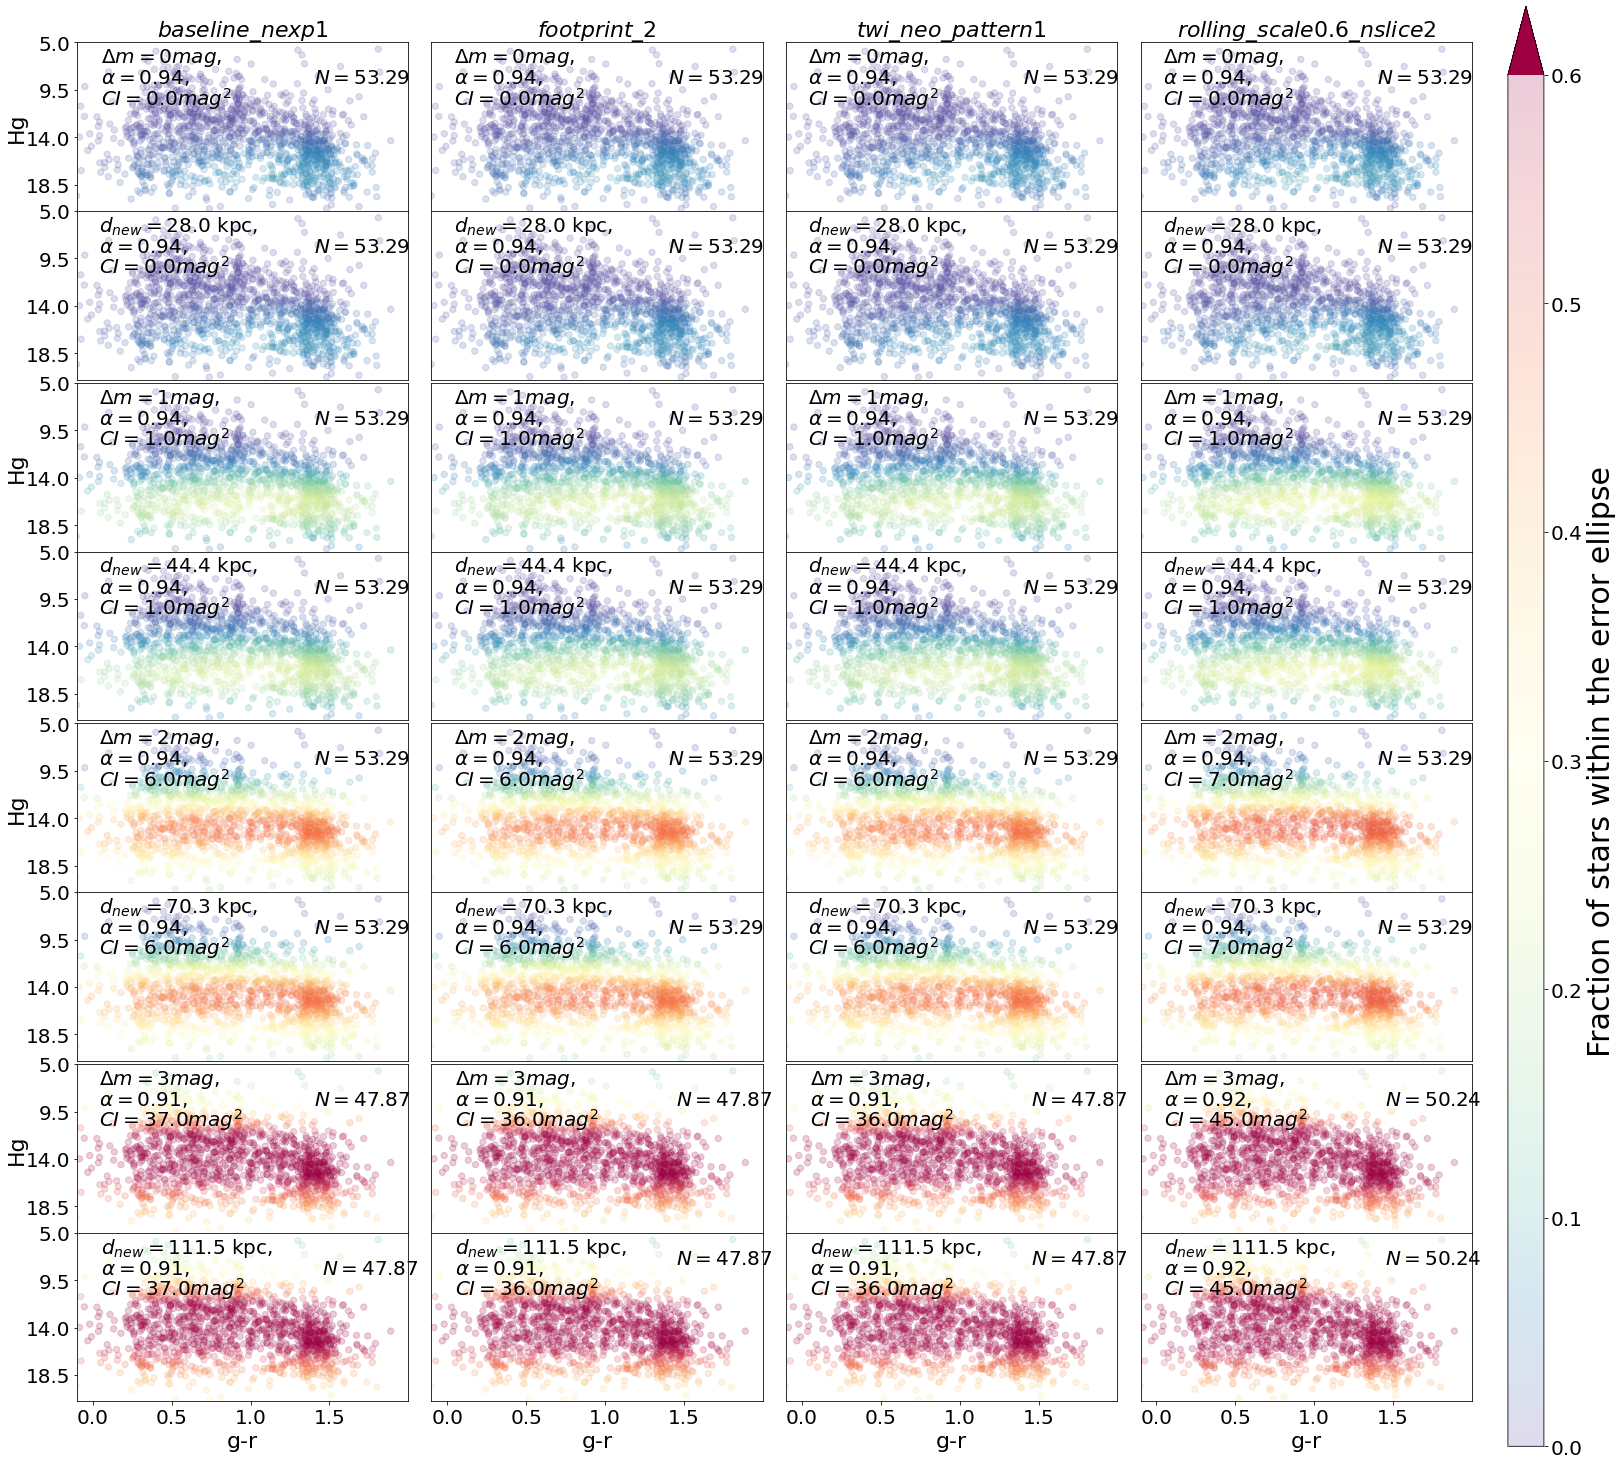

In [30]:
latexname= [r'$baseline\_nexp1$',r'$footprint\_2$',r'$twi\_neo\_pattern1$',r'$rolling\_scale0.6\_nslice2$']
latexname17 = [r'$baseline$',r'$rolling\_ns2\_rw0.5$',r'$vary\_gp\_gpfrac0.10$',r'$noroll$']

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

nrows = 4
ncols = 4
naxes = 2
xmin=-0.1
xmax=1.999 
ymin=5
ymax=21
vmin=0
vmax=0.6

f = plt.figure(figsize=(25, 25))

for i, (mag, key) in enumerate(product([0,1,2,3],namedb)):
    if i<4:
        n=latexname[i].split('_')
        if key in n:
            n.remove(version)
            n.remove('10yrs')
        sep='_'
        name= sep.join(n)
        
    #ag = axes_grid.Grid(f, (nrows, ncols, i+1), 
    #                    (naxes, 1), axes_pad=0)
    for j, mode in enumerate(['density','distance']):
        if (mode=='density') and (i==0):
                        
            zero_mask = np.where(cind_dens[key][mag]==0)
            non_zero_mask = np.where(c_dens[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])
            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dens[key][mag][non_zero_mask],x=c_dens[key][mag][non_zero_mask],
                       c=cind_dens[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dens[key][mag][0],2)),[0.05,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$\Delta m={} mag,$'.format(mag),[0.05,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dens[key][mag])),2),[0.05,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].yaxis.set_label_coords(-0.15,0)
            ag[j].set_ylabel('Hg',size=22)
            ag[j].set_xlabel('')
            ag[j].set_title(f'{name}',size=22)
            ag[j].get_xaxis().set_visible(False)


        if mode=='distance'and i==0:

            zero_mask = np.where(cind_dist[key][mag]==0)
            non_zero_mask = np.where(c_dist[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dist[key][mag][non_zero_mask],x=c_dist[key][mag][non_zero_mask],
                       c=cind_dist[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dist[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$d_{new}=$'+'{} kpc,'.format(np.round(28*10**(mag/5),1)),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dist[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)
        elif (mode=='density') and (i>=4) and (i not in [0,4,8,12,13,14,15]):

            zero_mask = np.where(cind_dens[key][mag]==0)
            non_zero_mask = np.where(c_dens[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dens[key][mag][non_zero_mask],x=c_dens[key][mag][non_zero_mask],
                       c=cind_dens[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dens[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$\Delta m={} mag,$'.format(mag),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dens[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)
            ag[j].get_yaxis().set_visible(False)

        elif (mode=='distance')and (i>=4) and (i not in [0,4,8,12,13,14,15]):

            zero_mask = np.where(cind_dist[key][mag]==0)
            non_zero_mask = np.where(c_dist[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dist[key][mag][non_zero_mask],x=c_dist[key][mag][non_zero_mask],
                       c=cind_dist[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dist[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$d_{new}=$'+'{} kpc,'.format(np.round(28*10**(mag/5),1)),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dist[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)
            ag[j].get_yaxis().set_visible(False)

        elif (mode=='density')and (i in [4,8]):

            zero_mask = np.where(cind_dens[key][mag]==0)
            non_zero_mask = np.where(c_dens[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dens[key][mag][non_zero_mask],x=c_dens[key][mag][non_zero_mask],
                       c=cind_dens[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dens[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$\Delta m={} mag,$'.format(mag),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dens[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].yaxis.set_label_coords(-0.15,0)
            ag[j].set_ylabel('Hg',size=22)       
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)


        elif (mode=='distance') and (i in [4,8]):

            zero_mask = np.where(cind_dist[key][mag]==0)
            non_zero_mask = np.where(c_dist[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dist[key][mag][non_zero_mask],x=c_dist[key][mag][non_zero_mask],
                       c=cind_dist[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dist[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$d_{new}=$'+'{} kpc,'.format(np.round(28*10**(mag/5),1)),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dist[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)


        elif (mode=='density') and (i  in [1,2,3]):

            zero_mask = np.where(cind_dens[key][mag]==0)
            non_zero_mask = np.where(c_dens[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dens[key][mag][non_zero_mask],x=c_dens[key][mag][non_zero_mask],
                       c=cind_dens[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dens[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$\Delta m={} mag,$'.format(mag),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dens[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('')
            ag[j].set_title(f'{name}',size=22)
            ag[j].get_xaxis().set_visible(False)
            ag[j].get_yaxis().set_visible(False)

        elif (mode=='distance') and (i  in [1,2,3]):

            zero_mask = np.where(cind_dist[key][mag]==0)
            non_zero_mask = np.where(c_dist[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dist[key][mag][non_zero_mask],x=c_dist[key][mag][non_zero_mask],
                       c=cind_dist[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dist[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$d_{new}=$'+'{} kpc,'.format(np.round(28*10**(mag/5),1)),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dist[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)
            ag[j].get_yaxis().set_visible(False)


        elif (mode=='density') and (i==12):

            zero_mask = np.where(cind_dens[key][mag]==0)
            non_zero_mask = np.where(c_dens[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dens[key][mag][non_zero_mask],x=c_dens[key][mag][non_zero_mask],
                       c=cind_dens[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dens[key][mag][0],2)),[0.04,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.4,8.9], size=20)
            ag[j].annotate(r'$\Delta m={} mag,$'.format(mag),[0.04,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dens[key][mag])),2),[0.04,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].yaxis.set_label_coords(-0.15,0)
            ag[j].set_ylabel('Hg',size=22)
            ag[j].set_xlabel('')

        elif mode=='distance'and i==12:

            zero_mask = np.where(cind_dist[key][mag]==0)
            non_zero_mask = np.where(c_dist[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dist[key][mag][non_zero_mask],x=c_dist[key][mag][non_zero_mask],
                       c=cind_dist[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dist[key][mag][0],2)),[0.05,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.45,8.9], size=20)
            ag[j].annotate(r'$d_{new}=$'+'{} kpc,'.format(np.round(28*10**(mag/5),1)),[0.05,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dist[key][mag])),2),[0.05,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('g-r',size=22)

        elif (mode=='density') and (i in [13,14,15]):

            zero_mask = np.where(cind_dens[key][mag]==0)
            non_zero_mask = np.where(c_dens[key][mag]!=0)
            gplot=np.dstack([H_dens[key][mag],c_dens[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])

            N=gm.weights_[0]*100
            ag[j].scatter(y=H_dens[key][mag][non_zero_mask],x=c_dens[key][mag][non_zero_mask],
                       c=cind_dens[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax+0.01, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dens[key][mag][0],2)),[0.05,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.45,8.9], size=20)
            ag[j].annotate(r'$\Delta m={} mag,$'.format(mag),[0.05,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dens[key][mag])),2),[0.05,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('')
            ag[j].get_xaxis().set_visible(False)
            ag[j].get_yaxis().set_visible(False)

        elif mode=='distance'and i in [13,14,15]:

            zero_mask = np.where(cind_dist[key][mag]==0)
            non_zero_mask = np.where(c_dist[key][mag]!=0)
            gplot=np.dstack([H_dist[key][mag],c_dist[key][mag]])
            gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])
            N=gm.weights_[0]*100
            im = ag[j].scatter(y=H_dist[key][mag][non_zero_mask],x=c_dist[key][mag][non_zero_mask],
                       c=cind_dist[key][mag][non_zero_mask],cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            ag[j].set_xlim([xmin,xmax])
            ag[j].set_ylim([ymin,ymax])
            ag[j].set_yticks(np.arange(ymin, ymax, 4.5))
            ag[j].annotate(r'$\alpha={} ,$'.format(np.round(alpha_dist[key][mag][0],2)),[0.05,8.9], size=20)
            ag[j].annotate(r'$N={}$'.format(np.round(N,2)),[1.45,8], size=20)
            ag[j].annotate(r'$d_{new}=$'+'{} kpc,'.format(np.round(28*10**(mag/5),1)),[0.05,6.9], size=20)
            ag[j].annotate(r'$CI = {} mag^2$'.format(np.round(np.median(err_ell_dist[key][mag])),2),[0.05,10.9], size=20)
            ag[j].invert_yaxis()
            ag[j].set_ylabel('')
            ag[j].set_xlabel('g-r',size=22)
            ag[j].get_yaxis().set_visible(False)

plt.subplots_adjust(wspace=0.07, hspace=0.01)
cb_ax = f.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = f.colorbar(im, cax=cb_ax,extend='max')
cbar.ax.set_ylabel('Fraction of stars within the error ellipse', size=30)
f.savefig("ConfunsionIndex_v2.0.pdf")